<table>
  <tr>
    <td> <center><img src="images/header1.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Анализ графов и социальных сетей</center></h2>
<h3><center>Шестаков Андрей, Ефимов Владислав</center></h3>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx

from IPython.display import Image, display

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

# Сети везде

## Социальные сети
<center><img src='images/fb.jpg', width=1200></center>

## Блогосфера
<center><img src='images/left-right.png' width=1200></center>

## Обмен ресурсами
<center><img src='images/power_exchanges_europes.png' width=1200></center>

## Обмен ресурсами
<center><img src='images/fin.jpg', width=1200></center>

## Дороги

<center><img src='https://cdn.lifehacker.ru/wp-content/uploads/2017/10/1_1506947861-630x473.jpg', width=1200></center>

## Анализ социальные сетей
<center><img src='images/karate.jpg', width=1200></center>

## Мем: 6 рукопожатий
<center><img src='images/milgram.jpg'></center>

* Six degrees of [Kevin Bacon](https://oracleofbacon.org/)
* [Erdos Number](https://en.wikipedia.org/wiki/Erd%C5%91s_number)

## Почему сети интересно изучать?
* Неслучайные и нерегулярные 
* Безмасштабность (scale-free) 
* Общие свойства в разных дисциплинах
* Дополнительный источник (топологической) информации

## Если мы все успеем, то мы с вами разберем 
* Что такое сети с формальной точки зрения
* Основные форматы хранения
* Экскурс в библиотеки
* Как оценить важность элементов сети
* Как оценить похожесть элементов сети

# Графы

**Граф** - математическая модель представления сетевых структур. Впредь слова  *сеть* и *граф* будут обозначать одно и тоже.

Графом $\mathcal{G}$ называется пара множеств $\mathcal{G} = (V, E)$, где $V$ содержит в себе множество *вершин (узлов, vertices, nodes)*, а $E$ содержит множество *ребер (связей, edges, links)*. <br/> 
Величины $n = |V|$ и $m = |E|$ называют *порядком (order of graph)* и *размером (size of graph)* графа. <br/> 


**Ребра, ориентированность, соседи**
* Ребро между вершинами $(v_i, v_j)$ обозначают $e_{ij}$. В неориентированном графе $e_{ij} = e_{ji}$ $\forall i,j$. <br/>
* В ориентированном графе ребро $e_{ij} = (v_i, v_j)$ показывает направление связи от $v_i$ к $v_j$.  <br/>
* Иногда ребрам в графе ставится в соответствие некоторое числовое значение $w_{ij} \in \mathbb{R}$, которое выражает силу связи между вершинами. Эти значения называют весами ребер, а графы с весами называют взвешенными. <br/>
* Вершины $v_i$ и $v_j$ называют соседями, если ребро $(v_i, v_j) \in E$. Множество смежных с $v_i$ вершин образуют множество соседей $N(v_i)$. Степень вершины - количество соседей $k_i = |N(v_i)|$<br/>
* Если в графе все вершины связаны друг с другом, то такой граф называется полным (клика)
* Если в графе из одной вершины всегда можной "дойти" до любой другой вершины, он называется связанным

<center><img src='./images/clique_init.png' width="750"/></center>

* Неориентированный
* Невзвешенный
* Cвязанный
* Подграф $\mathcal{G'}$ состоящий из вершин $v_1, \dots, v_5$ - полный подграф графа $\mathcal{G}$
* $V = \{v_1, \dots, v_{10} \}, |V| = 10$
* $E = \{(v_1, v_2), (v1, v3), \dots, (v_9, v_{10}) \}, |E| = ?$
* $N(v_2) = \{v_1, v_3, v_4, v_5, v_6, v_8\}$
* Степень вершины $v_2$: $k_2 = |N(v_2)| =  6$
* Расстояние между $v_5$ и $v_{7} = ?$

# Форматы представления графов

Форматов представления графов довольно много. Все форматы определяют топологию сети (т.е. её структуру), но некоторые могут не сохранять в себе все данные связанные с элементами сети (множество атрибутов ребер и вершин, динамические характеристики, рекоментованную прорисовку и тп).

Ниже мы рассмотрим наиболее распространенные форматы.

## Матрица смежности

Матрица связанности, Incidence matrix, Association matrix.

Матрица связанности - это квадратная матрица размера $n \times n$. Обозначим ее буквой $\mathbf{A}$ <br/>

**В невзвешенном графе:**<br/>
$\mathbf{A_{ij}} = 1$, если в графе есть ребро между вершинами $v_i$ и $v_j$ <br/>
$\mathbf{A_{ij}} = 0$, иначе

**Во взвешенном графе:**<br/>
$\mathbf{A_{ij}} = w_{ij}$, если в графе есть ребро между вершинами $v_i$ и $v_j$ <br/>
$\mathbf{A_{ij}} = 0$, иначе

Для графа выше матрица смежности имеет следующий вид:

<center><img src='./images/clique_matrix.png', width=1200></center>

**Преимущества:**
* Наглядность
* Удобно производить математические операции

**Недостатки:**
* Передает только структурную информацию (+ веса)
* При неправильном хранении может занимать много места в памяти и на жестком диске

## Список ребер

Edge list

Другой очевидный и популярный формат.

На каждой строчке указываются идентификаторы смежных вершин (числовые признаки этих связей - веса)

**Преимущества:**
* Достаточно легкий формат

**Недостатки:**
* Передает структурную информацию
* Может передавать несколько признаков связей (несколько весов)

## Список смежности

Adjacency list

Один из самых экономичных форматов. 

Каждая строчке соответствует вершине. Через запятую указываются идентификаторы смежных с ней вершин

**Преимущества:**
* Достаточно легкий формат

**Недостатки:**
* Передает только структурную информацию

## GraphML

Довольно "толстый" формат хранения данных, основанный на языке разметки XML. Представляет их себя набор тэгов, которые могут описать в сети абсолютно все.

**Преимущества:**
* Возможно передать всю информацию о графе, его структуре и характеристиках элементов

**Недостатки:**
* Много весит...

## GML

GML (Graph Modelling Language) - так же гибкий формат представления графов. Однако он является чуть более "читабельным", чем GraphML

**Преимущества:**
* Возможно передать всю информацию о графе, его структуре и характеристиках элементов

**Недостатки:**
* Много весит...

# Инструменты по работе с сетями

## Gephi

[Gephi](https://gephi.org/) - это очень крутой, кнопочный, написанный на  Java, open-source проект для анализа и визуализации сетей. <br/> Вместо тысячи слов:



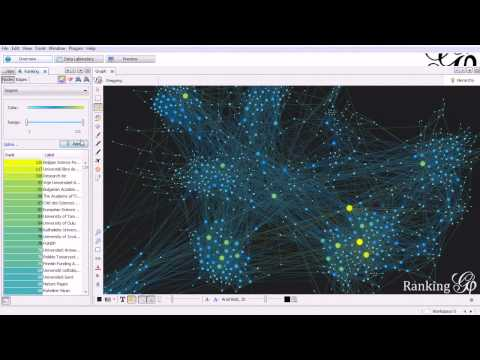

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('bXCBh6QH5W0')

## Библиотеки для работы с сетями на Python

В языке `python` чаще всего используются следующие библиотеки:
* `NetworkX` - подходит для работы с небольшими сетями
* [`graph-tool`](https://graph-tool.skewed.de/) - Библиотека для работы с большими сетями при поддержке OpenMP и Boost c API для `python`
* [SNAP](http://snap.stanford.edu/snappy/index.html) - Библиотека от Stanford для работы с большими сетями с API для `python`
* [`igraph`](http://igraph.org/python/) - Библиотека для работы с большими сетями c API для `python`  и `R`

FYI, можно посмотреть [бенчмарки](https://graph-tool.skewed.de/performance) для библиотек.

C сетями мы будем работать с помощью модуля [NetworkX](https://networkx.github.io/documentation/stable/). Функционала в нем постепенно становится больше и больше, но по скорости работы он сильно уступает библиотекам, реализованным на С и С++

# Tutorial по NetworkX

# Характеристики вершин/ребер сети

На основе сетевой структуры для вершин и ребер можно расчитать характеристики "важности" этих элементов.

Они еще называются "центральностями"

In [5]:
g = nx.Graph()
g.add_nodes_from(range(6))

g.add_edges_from([(0,1), (0,2), (2,3), (1,3), (3,4), (4,5)])
layout = nx.layout.spring_layout(g, seed=1231)

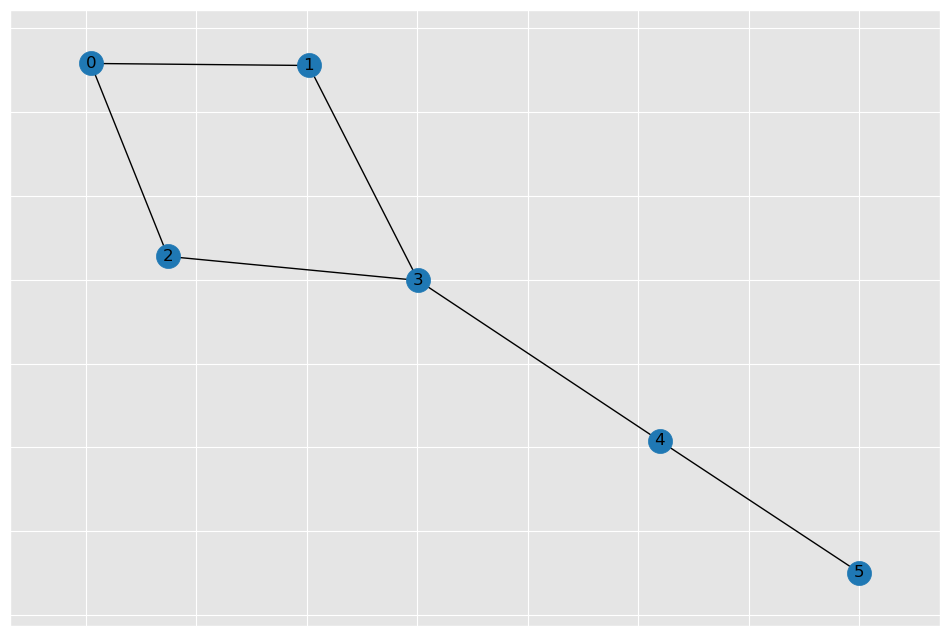

In [6]:
nx.draw_networkx(g, pos=layout)

## Degree centrality
Самая оцевидная центральность - просто степень узла. Характеризует некоторую популярность узла (много друзей, много связей).

$$ C_d(i) = k(i) = \sum_jA_{ij} = \sum_iA_{ij}$$
$$ \bar{C}_d(i) = \frac{1}{n-1} C_d(i)$$

Существует обобщение на ориентированные (prestige) и взвешенные сети.

In [7]:
degr = np.array(list(g.degree()))[:, 1]* 100
degr_cent = nx.centrality.degree_centrality(g)

{0: 0.4, 1: 0.4, 2: 0.4, 3: 0.6000000000000001, 4: 0.4, 5: 0.2}

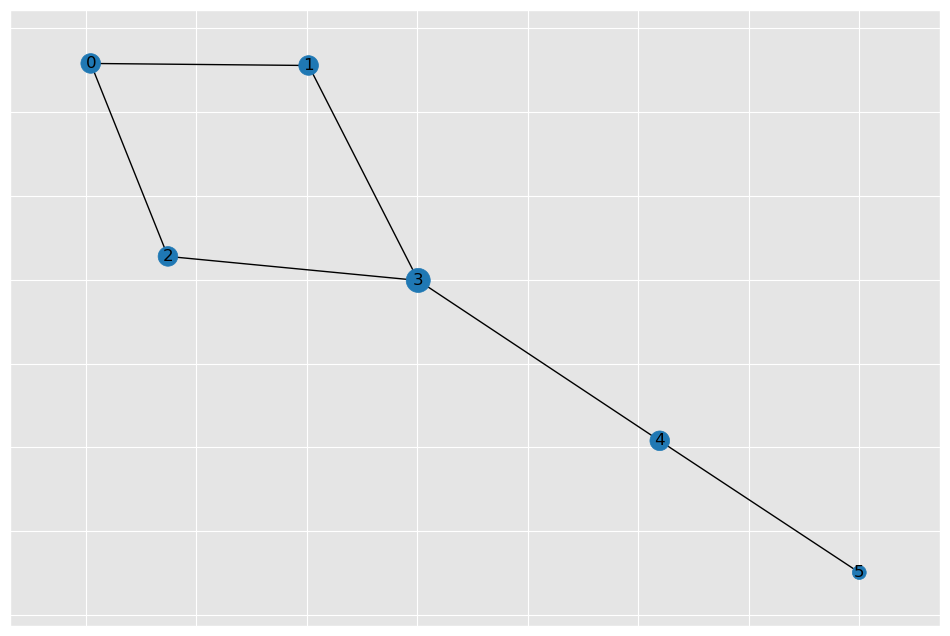

In [8]:
nx.draw_networkx(g, pos=layout, node_size=degr)
degr_cent

## Closeness centrality

Центральность, основанная на расстоянии до остальных вершин в графе.

$$ C_{cl}(i) = \frac{1}{\sum_j d(i,j)} $$

$$ \bar{C}_{cl}(i) = (n-1) \cdot C_{cl}(i) $$

Актор, расположенный в центре сети может быстро добраться до остальных акторов. Акторы на периферии расположены дальше.

**Вопрос:** что будет, если граф окажется несвязным?

In [9]:
closeness_nodes = nx.centrality.closeness_centrality(g)
closeness_nodes_values = np.array(list(closeness_nodes.values())) * 1000

{0: 0.45454545454545453,
 1: 0.5555555555555556,
 2: 0.5555555555555556,
 3: 0.7142857142857143,
 4: 0.5555555555555556,
 5: 0.38461538461538464}

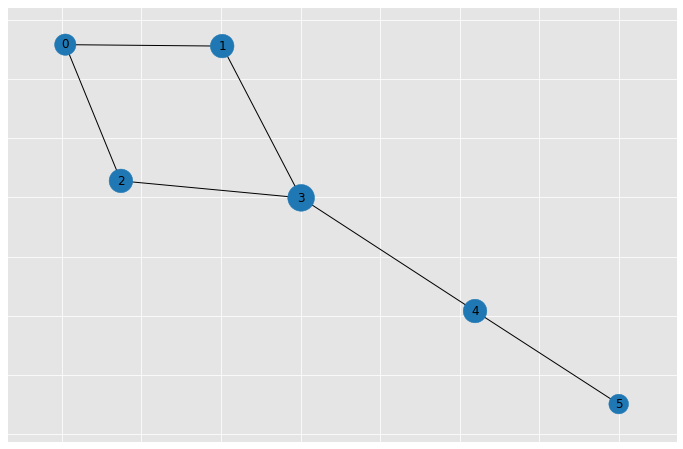

In [10]:
nx.draw_networkx(g, pos=layout, node_size=closeness_nodes_values)
closeness_nodes

## Betweenness centrality (nodes)

Пусть $\sigma_{st}$ - количество кратчайших путей между вершинами $s$ и $t$, а $\sigma_{st}(i)$ - кр. пути между $v_s$ и $v_t$, которые проходят через вершину $v_i$.

Тогда 
$$ C_b(i) = \sum\limits_{s\neq t\neq i} \frac{\sigma_{st}(i)}{\sigma_{st}} $$

$$ \bar{C}_b(i) = \frac{2}{(n-1)(n-2)}C_b(i) $$

In [11]:
betw_nodes = nx.betweenness_centrality(g) 
betw_nodes_values = np.array(list(betw_nodes.values())) * 1000

{0: 0.05,
 1: 0.15000000000000002,
 2: 0.15000000000000002,
 3: 0.65,
 4: 0.4,
 5: 0.0}

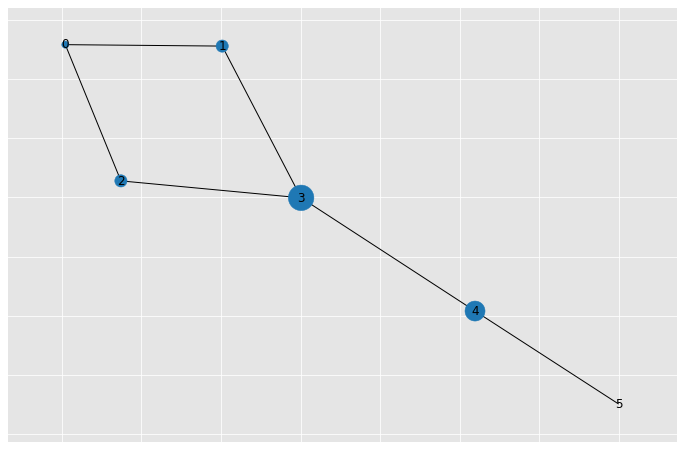

In [12]:
nx.draw_networkx(g, pos=layout, node_size=betw_nodes_values)
betw_nodes

## Betweenness centrality (edges)
Betweenness также можно расчитывать для ребер! Давайте определим для каких ребер она наибольшая и что это может нам дать?

In [13]:
betw_edg = nx.centrality.edge_betweenness_centrality(g)

In [14]:
sources = []
targets = []
betw = []
for e, b in betw_edg.items():
    sources.append(e[0])
    targets.append(e[1])
    betw.append(b)
df = pd.DataFrame({'source': sources, 
                   'target': targets,
                   'betw': betw})

,source,target,betw
4,3,4,0.533333
2,1,3,0.333333
3,2,3,0.333333
5,4,5,0.333333
0,0,1,0.200000
1,0,2,0.200000


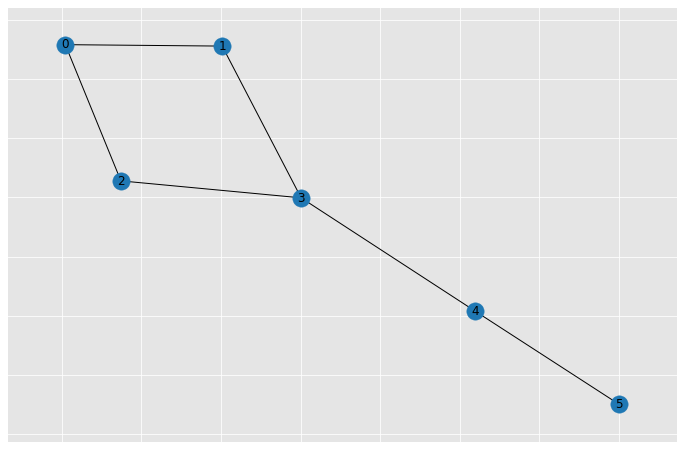

In [15]:
nx.draw_networkx(g, pos=layout)
df.sort_values('betw', ascending=False, )

## Page Rank

Идея PageRank заключается в попытке описать блуждание по вершинам графа. Вероятность перехода в вершину $v_i$ обратнопропорциональна степеням входящих связанных с ней вершин.

$$p^{t+1} = (D^{-1}A)^\top p^t = P^\top p^t$$

Помимо случайного блуждания между соседними вершинами заложен механизм "телепорта" между случайными вершинами с вероятностью $1-\alpha$.

$$ \mathbb{P} = \alpha P + \frac{(1 - \alpha)}{n} E,$$
где $E$ - это матрица состоящая из единиц.

Вектор Page Rank является одним из решений задачи на поиск собственного числа матрицы $\mathbb{P}$

$$\mathbb{P}^\top p = \lambda p$$

In [16]:
pr_nodes = nx.pagerank(g)
pr = np.array(list(pr_nodes.values())) * 1500

{0: 0.1619531043247219,
 1: 0.16112205885619563,
 2: 0.16112205885619563,
 3: 0.2374999999999999,
 4: 0.17775588228760858,
 5: 0.100546895675278}

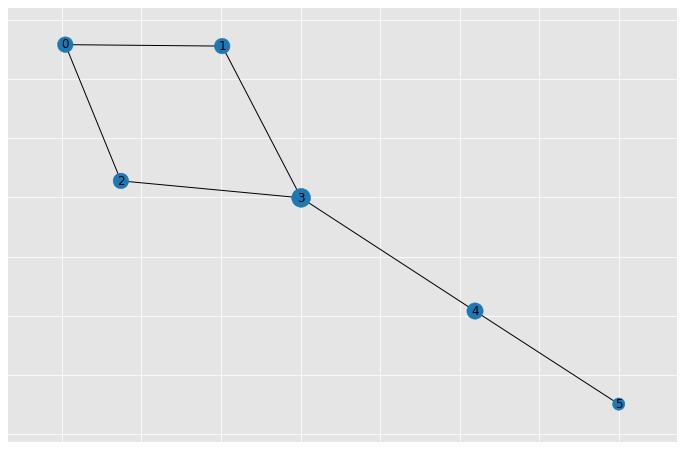

In [17]:
nx.draw_networkx(g, pos=layout, node_size=pr)
pr_nodes

## "Геометрическая" центральность
Eccentricity - максимальная длина кратчайшего пути из вершины $i$ до всех остальных вершин $e(i) = \max\limits_j d(i, j)$.

Диаметр - $\max e(i)$<br/>
Радиус - $\min e(i)$

Центральными вершинами являются те, у которых $e(i)$ равна радиусу графа

In [18]:
print(nx.radius(g))
print(nx.diameter(g))

2
4


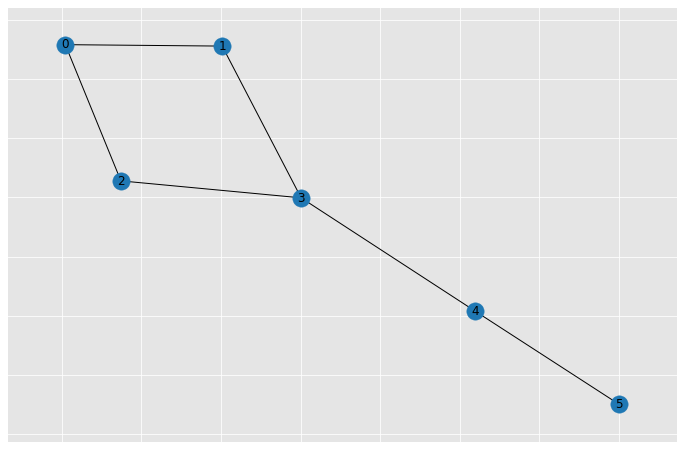

In [19]:
nx.draw_networkx(g, pos=layout)

In [20]:
ecc_nodes = nx.eccentricity(g)
ecc = np.array(list(ecc_nodes.values())) * 100

{0: 4, 1: 3, 2: 3, 3: 2, 4: 3, 5: 4}

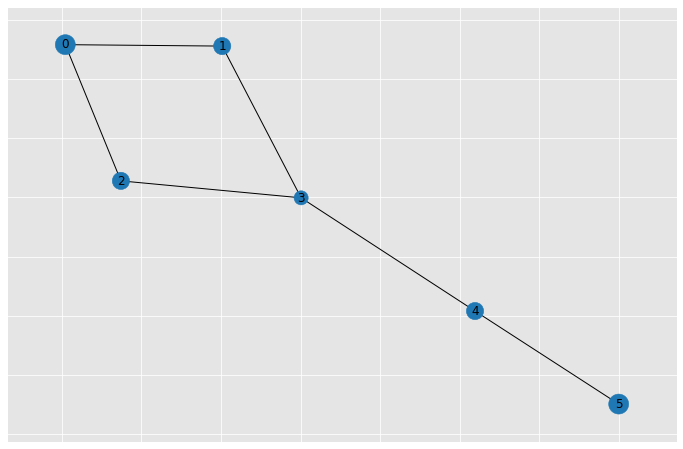

In [21]:
nx.draw_networkx(g, pos=layout, node_size=ecc)
ecc_nodes

### Clustering coefficient
Доля "треугольников" в среди соседей вершины.

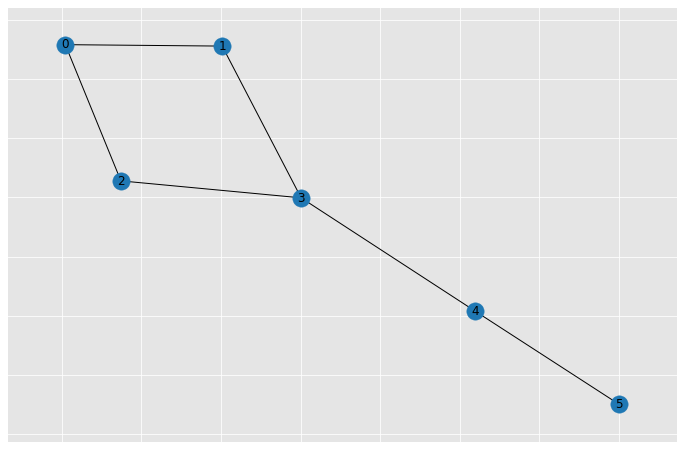

In [22]:
nx.draw_networkx(g, pos=layout)

{0: 1, 1: 2, 2: 2, 3: 1, 4: 0, 5: 0}

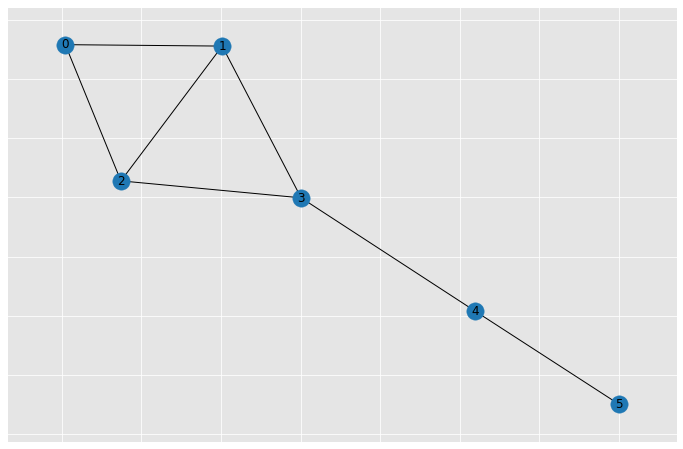

In [23]:
g.add_edge(1,2)
nx.draw_networkx(g, pos=layout)
nx.triangles(g)

## Центральностей еще очень много
* See [wiki](https://en.wikipedia.org/wiki/Centrality)

Возьмите граф друзей и найдите в нем "самые важные вершины"

# Выявление сообществ в сети
<center><img src='https://cdn-images-1.medium.com/max/1600/1*fVGpU47jjKRVKdiYqeODkw.png', width=1200></center>

Eсли сеть состоит из нескольких множеств узлов с многочисленными и насыщенными внутренними связями и редкими исходящими связями, то говорят, что данная сеть имеет структуру сообществ (community structure). 

Примеры:
* Соц-сети: группы по интересам
* Cистемы передачи информации:страницы или сервера разбиваются на группы
* Биологические системы

Не существует общепринятого определения "сообщества" в сетевом анализе

* Очевидно, сообщество, должно быть связным подграфом. 
* 'Количество ребер внутри сообщества' > 'число ребер, соединяющих его с остальными узлами сети'

## Модели на основе связанности

* **Клика** - максимальный подграф из 3х и более вершин, такой что каждая вершина в нем соединена со всеми остальными

<center><img src='images/klique.png', width=1200></center>

* Слишком строгие требования для сообщества

## Релаксация критерия "кликовости"
* $n$-клика ($n$-clique) - максимальный подграф, такой что расстояние между каждой парой вершин на *исходном графе* не превышает $n$
    * $n$-клики могут пересекаться
    * полученные подграфы могут быть несвязаны
    
<center><img src='images/example.png' width=500></center>

* $(v_1, v_2, v_3, v_4, v_5)$, $(v_2, v_3, v_4, v_5, v_6)$ - $2$-клики

## Релаксация критерия "кликовости"
* $n$-клан ($n$-clan) - $n$-клика с диаметром не превосходящим $n$
    
<center><img src='images/example.png' width=500></center>

* $(v_2, v_3, v_4, v_5, v_6)$ - $2$-клан

## Релаксация критерия "кликовости"
* $n$-клуб ($n$-club) - максимальный подграф с диаметром, не превосходящим $n$
    
<center><img src='images/example.png' width=500></center>

* $(v_1, v_2, v_3, v_4)$ - $2$-клуб

## Модели, основанные на степени узлов

* Узлы должны обладать определенным минимальным числом соседей

### k-core

* $k$-ядро – это максимальный подграф, в котором каждый узел смежен хотя бы с $k$ другими узлами: все узлы в $k$-ядре обладают степенью не меньше $k$ 

<center><img src='images/core.png' width=800></center>

* k-core так же можно использовать для "очистки" сетей от "неинтересных" вершин

## Схожесть вершин

Понятие **"эквивалетности"** вершин можно ослабить до **"схожести"** вершин - некоторая мера структурной близости вершин. 

Наиболее распространенные практические применения мер сходства:
* Выявление сообществ
* Предсказание связей

## Примеры мер сходства

* $A_{ij}$ -  элемент матрицы смежности сети
* $N(v_i)$ - соседи вершины $v_i$

#### Jaccard Similarity
$$ s(v_i, v_j) = \frac{|N(v_i) \cap N(v_j)|}{|N(v_i) \cup N(v_j)|} $$

#### Cosine Similarity
$$ s(v_i, v_j) = \frac{\langle A_{i \cdot}, A_{j \cdot} \rangle}{\sqrt{\sum_k A^2_{ik}} \sqrt{\sum_k A^2_{jk}}} $$

#### Correlation
$$ s(v_i, v_j) = \frac{\sum_k (A_{ik} - \bar{A}_{i\cdot}) (A_{jk} - \bar{A}_{j\cdot})}{\sqrt{\sum_k (A_{ik} - \bar{A}_{i\cdot})^2} \sqrt{\sum_k (A_{jk} - \bar{A}_{j\cdot})^2}} $$

#### Adamic-Adar Score
$$ s(v_i, v_j) = \sum\limits_{z \in N(v_i) \cap N(v_j)} \frac{1}{\log(|N(z)|)} $$

#### Preferential Attachment Score
$$ s(v_i, v_j) = |N(v_i)| \cdot |N(v_j)| $$

#### Что можно делать имея попарное сходство между объектами?

Кластеризацию!

# Некоторые специфичные для графов методы

### Label Propagation

* Каждой из вершин приписывается определенное уникальное сообщество
* На каждом шаге вершина принимает ту метку сообщества, которая больше других выражена у соседей

<center><img src='images/labelprop.jpg' width=800></center>

* Какие недостатки вы здесь видите?

### Girvan and Newman EdgeBetweenness

1. Вычислить меру betweenness centrality для каждого ребра
2. Найти ребро с наибольшим значением и удалить
3. Проверить граф на связанность - присвоить метку связанным компонентам
4. Повторять шаги 1-3 пока не будут удалены все ребра

<center><img src='images/girnew041.png' width=800></center>


* На выходе - иерархия!
* Как же выбрать количество cообществ?!

### Community Scoring Functions

Как и в "табличной" кластеризации, качество community detection можно оценить и без ground truth. Для этого считают так называемые scoring functions.

Чего бы нам хотелось получить от выявленного сообщества (разбиения на сообщества):
* Плотности ребер внутри сообщества
* БОльшая доря ребер внутри сообщества относительно ребер, связывающих его с внешним миром
* Высокий коэффициент кластаризации внутри сообщества (относительно среднего по сети)
* Высокая **модулярность**

В [статье](https://arxiv.org/pdf/1205.6233.pdf) можно найти наиболее полный набор так называемых scoring functions


### Modularity

* Пусть в результате какого-то алгоритма мы получили разбиение на сообщества $C_1,C_2,\dots,C_k$
* Хочется понять насколько это хорошее разбиения
* Сравним раскраску нашего графа на сообщества с той же раскраской, но другого графа с теми же свойствами

In [24]:
g1 = nx.erdos_renyi_graph(10, 0.4, seed=10)
g2 = nx.erdos_renyi_graph(7, 0.6, seed=10)
g3 = nx.disjoint_union(g1,g2)
g3.add_edges_from([(0,13)])
exp_degree = np.array(list(g3.degree()))[:,1]
g3_random = nx.expected_degree_graph(exp_degree, seed=1234)

m_layout = nx.layout.spring_layout(g3)
mod_labeling = [0]*10 + [1]*7
mod_partition = [set(range(10)), set(range(10, 17))]

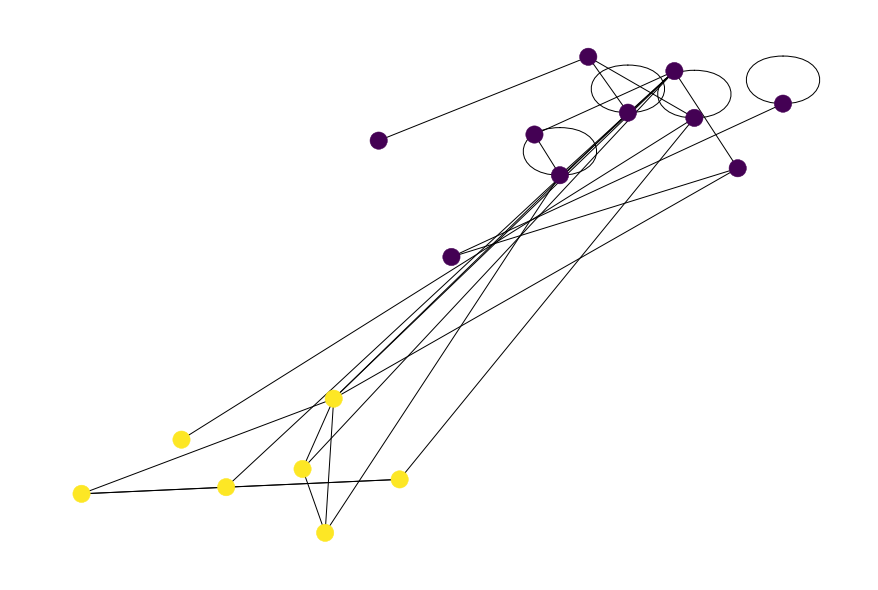

In [25]:
nx.draw(g3_random, pos=m_layout, node_color=mod_labeling)

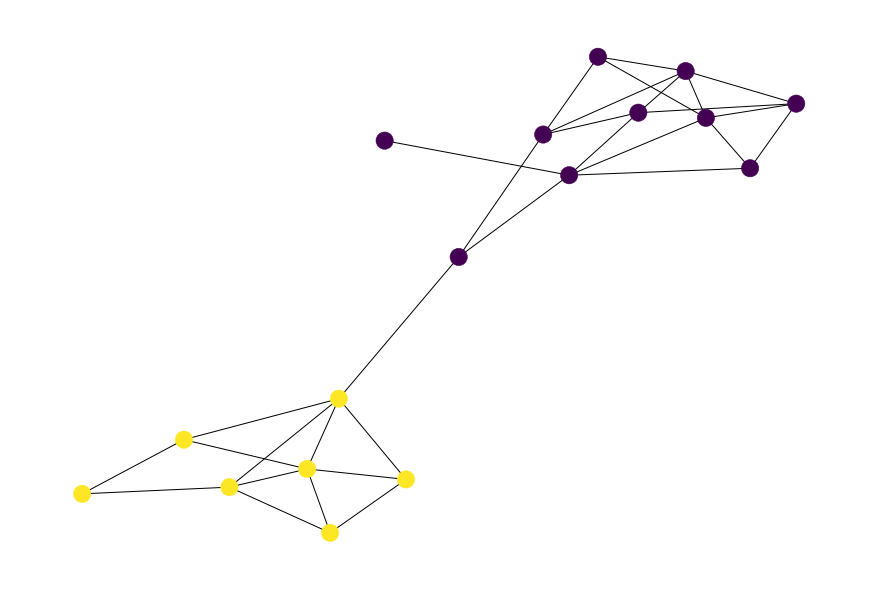

In [26]:
nx.draw(g3, pos=m_layout, node_color=mod_labeling)

## Modularity

$$ 
\begin{align}
Q & = \frac{1}{2m} \sum\limits_{ij}\left(A_{ij} - P_{ij}\right)\delta(\mathcal{C}_i,\mathcal{C}_j) = \\
& = \frac{1}{2m} \sum\limits_{ij}\left(A_{ij} - \frac{k_i k_j}{2m}\right)\delta(\mathcal{C}_i,\mathcal{C}_j)
\end{align}$$ 

где 
* $\delta(x, y) = 1$, если $x=y$ и $0$ - иначе
* $P_{ij}$ - вероятность возникновения ребра между вершинами $v_i$ и $v_j$
* $\mathcal{C}_i$ - метка кластера для вершины $v_i$

Какова область значения модулярности?


### Возвращаясь к нашему вопросу
* Выбираем то разбиение, которое обладает наибольшей модулярностью
<center><img src='images/girnew04.png' width=1200></center>


## Другие методы выявления сообществ
* Существуют так же методы, которые напрямую оптимизируют модулярность
* Существуют методы, которые используют различные спектральные свойства матрицы смежности
* И др - см [статью](https://arxiv.org/pdf/0906.0612.pdf)

# Асортативное смешивание (Assortative Mixing)

## Асортативное смешивание (Assortative Mixing)
* Мера асортативности - это способ измерения гомофилии в сети.
* Насколько схожие по некоторому признаку вершины склонны формировать связи друг с другом



* Можно попытаться ответить на вопросы типа:
    * Действительно ли сообщество образовано на основе места проживания
    * Насколько сильно похожа зарплата людей в соц-сети


## Aсортативность для категориального признака

Пусть 
* $e_{ij}$ - доля ребер, связывающих вершины типа $i$ и вершины типа $j$
* $a_{i} = \sum_j e_{ij}$ - доля ребер, с вершиной типа $i$ на любом конце
* $b_{j} = \sum_i e_{ij}$ - доля ребер, с вершиной типа $j$ на любом конце

$$ r = \frac{\sum_i e_{ii} - \sum_{ij}a_ib_j}{1 - \sum_{ij}a_ib_j} $$

In [27]:
g_test = nx.complete_graph(6)

g_test.add_nodes_from(range(6,10))
g_test.add_edges_from([(6,8), (6,7), (7,8), (8,9), (9,7)])

In [28]:
categ = dict(zip(range(10), [0]*6 + [1]*4))
nx.set_node_attributes(g_test, categ, 'categ')



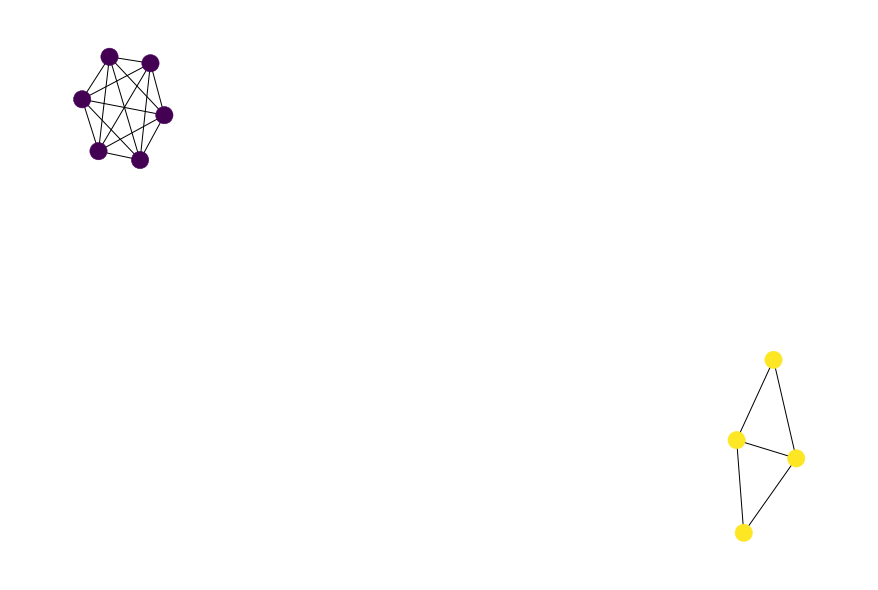

In [29]:
nx.draw_spring(g_test, node_color=list(categ.values()))




In [30]:
nx.assortativity.attribute_assortativity_coefficient(g_test, 'categ')

1.0

In [31]:
g_test = nx.Graph()
g_test.add_nodes_from(range(4))

g_test.add_edges_from([(0,1), (2,3)])
categ = dict(zip(range(4), [0,1,0,1]))
nx.set_node_attributes(g_test, categ, 'categ')

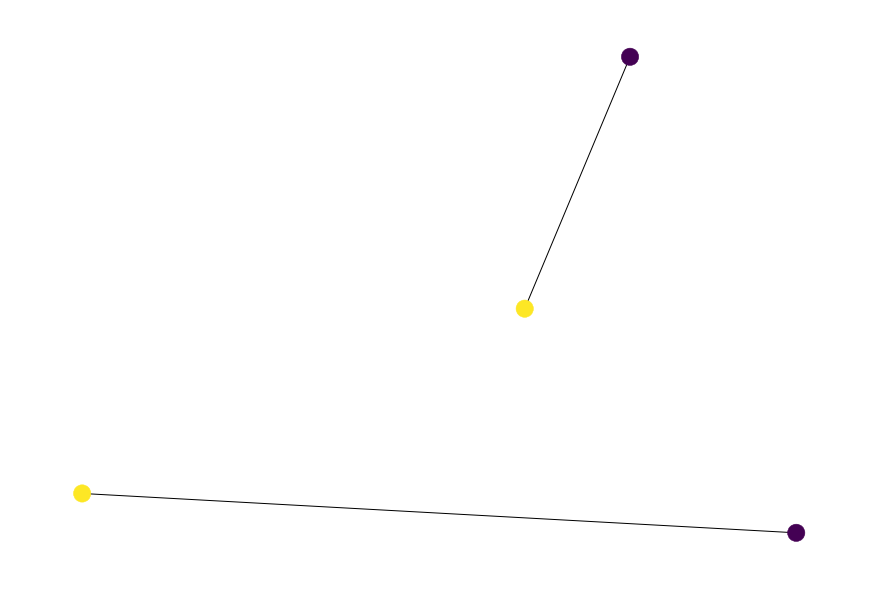

In [32]:
nx.draw(g_test, node_color=list(categ.values()))

In [33]:
nx.assortativity.attribute_assortativity_coefficient(g_test, 'categ')

-1.0

## Полезные ссылки
* [Курс по соц-сетям от Л. Жукова](http://leonidzhukov.net/hse/2014/socialnetworks/)
* [Курс со соц-сетям от Stanford](http://web.stanford.edu/class/cs224w/index.html)

# Спасибо за внимание!
## Пожалуйста, оставьте отзыв